<a href="https://colab.research.google.com/github/brendaverch/Preco_Imoveis_SP/blob/main/Dados_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Explorando a base de dados

In [ ]:
dados = pd.read_csv('/content/dados_imoveis.csv')
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
5786,Rua Ucaiari,Alto da Lapa,São Paulo,143,3,5,2,R$ 1.200.000
520,NaN,Jardim Guedala,São Paulo,454,4,5,5,R$ 3.500.000
6352,Rua Nazaré Paulista,Vila Madalena,São Paulo,244,4,4,3,R$ 1.800.000
3622,NaN,Alto de Pinheiros,São Paulo,211,3,4,7,R$ 4.850.000
6182,NaN,Sumarezinho,São Paulo,253,4,3,4,R$ 20.000\n /Mês
4944,Avenida Engenheiro Saraiva de Oliveira,Jardim Taboão,São Paulo,200,4,4,3,R$ 4.500\n /Mês
504,NaN,Jardim Guedala,São Paulo,449,4,5,5,R$ 3.500.000
2605,Avenida Ceci,Planalto Paulista,São Paulo,350,4,4,3,R$ 2.500.000
9347,Rua Pedro Teixeira,Vila Olímpia,São Paulo,140,3,3,1,R$ 1.300.000
3802,Avenida Ireré,Planalto Paulista,São Paulo,356,4,2,4,R$ 2.500.000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
imoveis_vila = (dados['Bairro'] == "Vila Mariana")
imoveis_vila

0        False
1        False
2        False
3        False
4        False
         ...  
10003    False
10004    False
10005    False
10006    False
10007    False
Name: Bairro, Length: 10008, dtype: bool

In [ ]:
imoveis_vila_mariana = dados[imoveis_vila]

In [ ]:
dados['Bairro'].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

<Axes: >

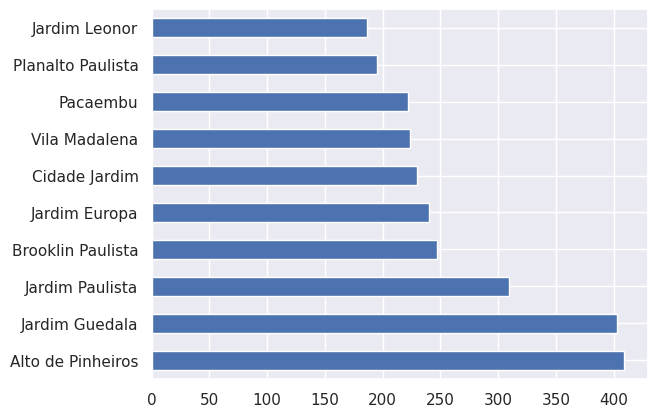

In [ ]:
imoveis_bairro = dados['Bairro'].value_counts()
imoveis_bairro.head(10).plot.barh()

In [ ]:
dados['Rua'].isnull().sum()

3434

# Tratamento dos dados

In [ ]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [ ]:
dados['Valor'].str.split(expand = True)

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [ ]:
dados['Valor'].str.split(expand = True)[0].unique()

array(['R$'], dtype=object)

In [ ]:
len(dados['Valor'].str.split(expand = True)[1].unique())

1038

In [ ]:
dados['Valor'].str.split(expand = True)[2].unique()

array([None, '/Mês', '/Ano', '/Dia'], dtype=object)

In [ ]:
dados[['Moeda', 'Valor_anuncio', 'Tipo_anuncio'] ]= dados['Valor'].str.split(expand = True)
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [ ]:
dados[dados['Tipo_anuncio'].isnull()]['Tipo_anuncio'].unique()

array([None], dtype=object)

In [ ]:
dados_vendas = dados[dados['Tipo_anuncio'].isnull()]
dados_vendas.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
618,Rua Doutor Jesuíno de Abreu,Jardim Morumbi,São Paulo,285,3,5,3,R$ 1.250.000,R$,1.250.000,None
2077,NaN,Jardim Marajoara,São Paulo,400,4,3,4,R$ 2.950.000,R$,2.950.000,None
1645,"Rua Caetano de Campos, 000",Vila Moreira,São Paulo,140,3,2,2,R$ 1.200.000,R$,1.200.000,None
1477,NaN,Jardim Cordeiro,São Paulo,937,6,9,7,R$ 7.500.000,R$,7.500.000,None
7704,NaN,Vila Nivi,São Paulo,77,2,1,2,R$ 380.000,R$,380.000,None
4370,Rua Armando Pinto,Sumarezinho,São Paulo,120,6,4,5,R$ 1.500.000,R$,1.500.000,None
1945,Rua Banibás,Alto de Pinheiros,São Paulo,346,4,3,4,R$ 3.000.000,R$,3.000.000,None
3018,Rua Stefan Marek Neuding,Jardim Sílvia (Zona Oeste),São Paulo,627,4,6,6,R$ 5.000.000,R$,5.000.000,None
5232,Rua Joazeiro,Sumaré,São Paulo,550,3,5,5,R$ 3.900.000,R$,3.900.000,None
3668,Rua Padre Marchetti,Ipiranga,São Paulo,150,2,3,2,R$ 550.000,R$,550.000,None


In [ ]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6107 non-null   object
 1   Bairro         9146 non-null   object
 2   Cidade         9156 non-null   object
 3   Metragem       9156 non-null   int64 
 4   Quartos        9156 non-null   int64 
 5   Banheiros      9156 non-null   int64 
 6   Vagas          9156 non-null   int64 
 7   Valor          9156 non-null   object
 8   Moeda          9156 non-null   object
 9   Valor_anuncio  9156 non-null   object
 10  Tipo_anuncio   0 non-null      object
dtypes: int64(4), object(7)
memory usage: 858.4+ KB


In [ ]:
dados_vendas['Valor_anuncio'] = dados_vendas['Valor_anuncio'].str.replace('.', '').astype(float)


<ipython-input-252-d451ab92a537>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dados_vendas['Valor_anuncio'] = dados_vendas['Valor_anuncio'].str.replace('.', '').astype(float)
<ipython-input-252-d451ab92a537>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['Valor_anuncio'] = dados_vendas['Valor_anuncio'].str.replace('.', '').astype(float)


<Axes: ylabel='Frequency'>

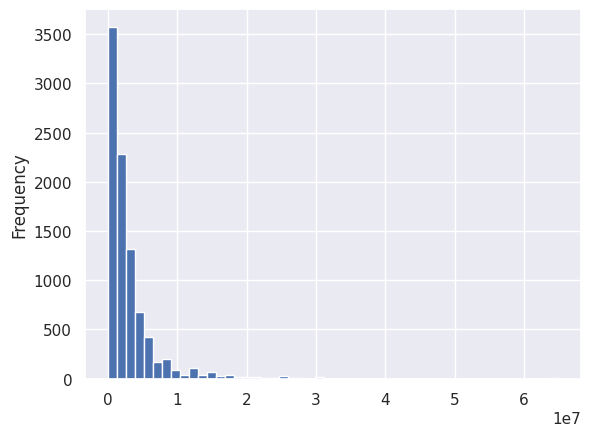

In [ ]:
dados_vendas['Valor_anuncio'].plot.hist(bins=50)

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
dados_vendas.describe()
dados_vendas.describe(include='all')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
count,6107,9146,9156,9156.00,9156.00,9156.00,9156.00,9156,9156,9156.00,0
unique,3006,697,1,NaN,NaN,NaN,NaN,939,1,NaN,0
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo,NaN,NaN,NaN,NaN,R$ 2.500.000,R$,NaN,NaN
freq,24,369,9156,NaN,NaN,NaN,NaN,182,9156,NaN,NaN
mean,NaN,NaN,NaN,434.42,3.45,3.80,3.96,NaN,NaN,3052202.96,NaN
std,NaN,NaN,NaN,7856.42,1.05,1.97,2.60,NaN,NaN,3944208.19,NaN
min,NaN,NaN,NaN,10.00,1.00,1.00,1.00,NaN,NaN,13000.00,NaN
25%,NaN,NaN,NaN,168.00,3.00,2.00,2.00,NaN,NaN,890000.00,NaN
50%,NaN,NaN,NaN,276.00,3.00,4.00,4.00,NaN,NaN,1800000.00,NaN
75%,NaN,NaN,NaN,450.00,4.00,5.00,5.00,NaN,NaN,3500000.00,NaN


# Analise gráfica

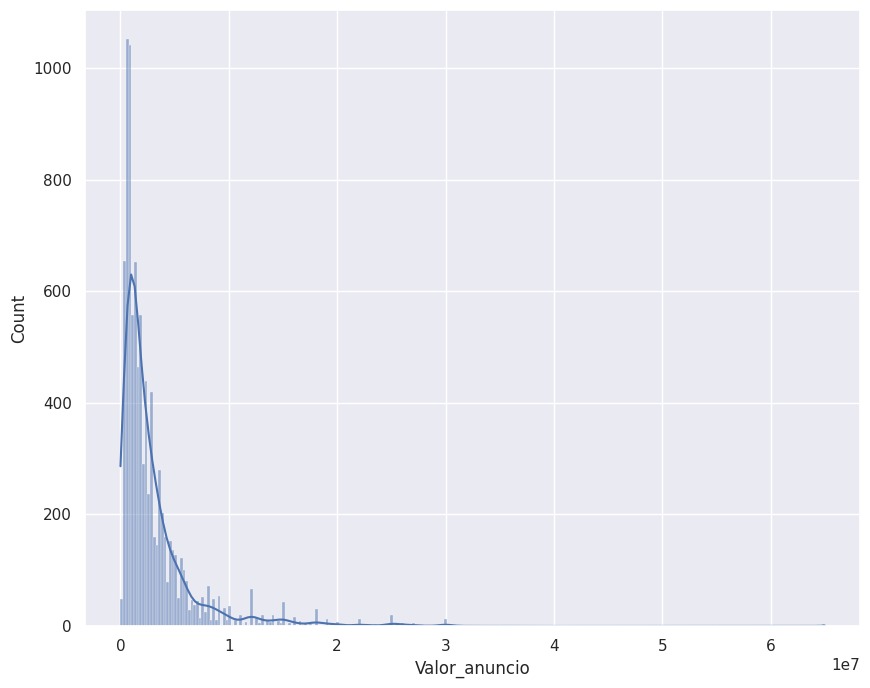

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize= (10,8))
ax = sns.histplot( data = dados_vendas, x = 'Valor_anuncio', kde =True)
plt.show()

In [ ]:
dados_vendas['Valor_m2'] = dados_vendas['Valor_anuncio']/dados_vendas['Metragem']
dados_vendas.head()

<ipython-input-256-50ad6b14de26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['Valor_m2'] = dados_vendas['Valor_anuncio']/dados_vendas['Metragem']


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,5400.00


In [ ]:
dados_vendas['Valor_mm'] = dados_vendas['Valor_anuncio']/1000000
dados_vendas.head()

<ipython-input-287-977f61903961>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas['Valor_mm'] = dados_vendas['Valor_anuncio']/1000000


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_m2,Valor_mm,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7000.00,7.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,7459.68,3.70,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,3040.00,0.38,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,2209.68,0.69,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,5400.00,0.54,rua tobias barreto


In [ ]:
dados_vendas.groupby('Bairro').mean()

<ipython-input-257-e4c31a0695c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados_vendas.groupby('Bairro').mean()


,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10


In [ ]:
dados_bairro = dados_vendas.groupby("Bairro").sum()

<ipython-input-258-e5773842ebd3>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dados_bairro = dados_vendas.groupby("Bairro").sum()


In [ ]:
dados_bairro['Valor_m2_bairro'] = dados_bairro['Valor_anuncio']/dados_bairro['Metragem']

In [ ]:
dados_bairro.head()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34


In [ ]:
top_bairros = dados_vendas['Bairro'].value_counts()[:10].index

In [ ]:
dados_bairro.query('Bairro in @top_bairros')

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_m2,Valor_m2_bairro
Bairro,,,,,,,
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90
Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10
Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
Jardim Guedala,972212,1443,2027,2161,1801165587.00,2833882.79,1852.65
Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49
Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90
Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54


In [ ]:
dados_bairro = dados_bairro.reset_index()

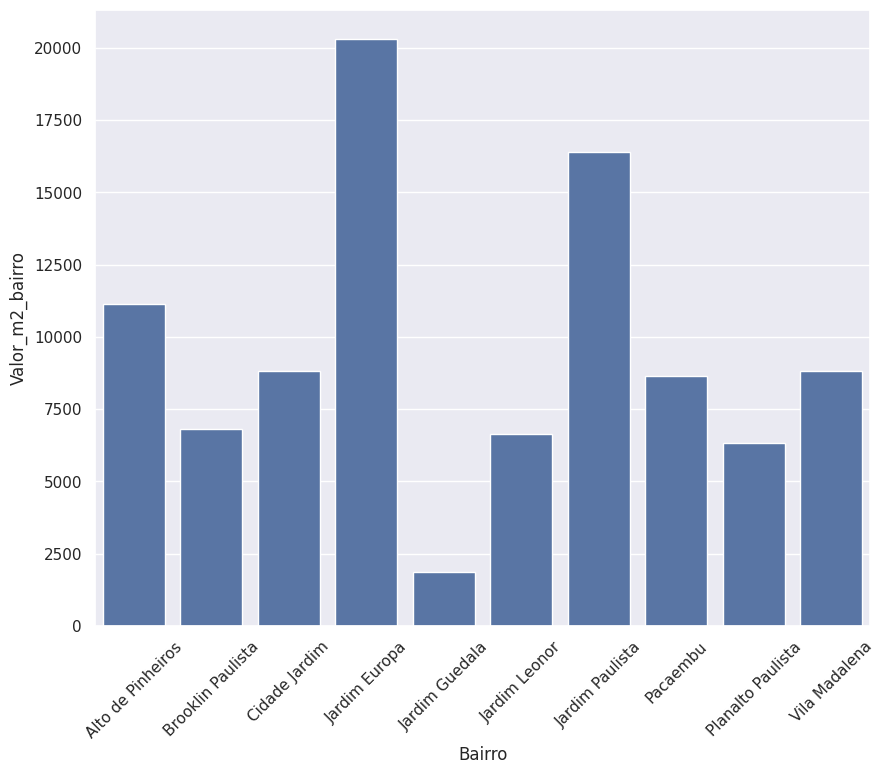

In [ ]:
plt.figure(figsize= (10,8))

ax = sns.barplot( x ='Bairro',y='Valor_m2_bairro' , data=dados_bairro.query('Bairro in @top_bairros'))
ax.tick_params(axis='x', rotation=45)

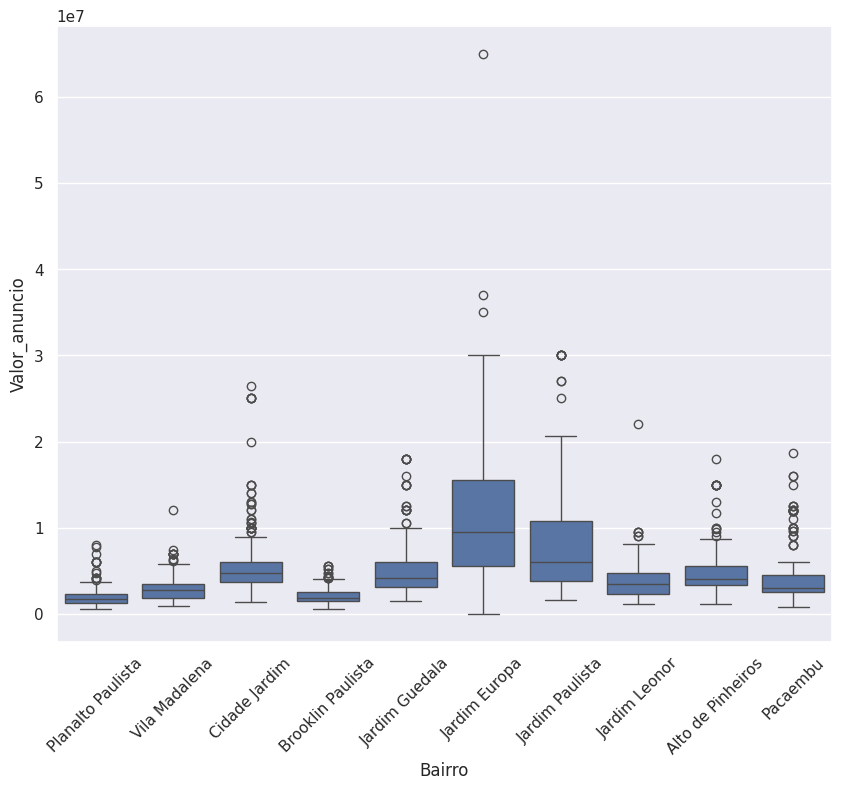

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Valor_anuncio")
ax.tick_params(axis='x', rotation=45)
plt.show()

# Unindo bases

In [ ]:
#segunda base de dados
pd.read_csv('/content/Basico_SP1.csv')

,,,,,,,,,,Cod_setor;Cod_Grandes Regi�es;Nome_Grande_Regiao;Cod_UF;Nome_da_UF ;Cod_meso;Nome_da_meso;Cod_micro;Nome_da_micro;Cod_RM;Nome_da_RM;Cod_municipio;Nome_do_municipio;Cod_distrito;Nome_do_distrito;Cod_subdistrito;Nome_do_subdistrito;Cod_bairro;Nome_do_bairro;Situacao_setor;Tipo_setor;V001;V002;V003;V004;V005;V006;V007;V008;V009;V010;V011;V012;
"355030801000001;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;266;800;3",01;2,32;2091,32;8532451,78;2164,55;8673276,78;1227,41;4285771,99;1713,75;5152087,86.00
"355030801000002;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;306;913;2",98;2,09;1650,09;3983441,31;1717,44;4030519,99;1045,78;2572133,32;1468,08;2991546,94.00
"355030801000003;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;189;625;3",31;3,08;1280,43;5474593,06;2349,53;7553913,02;902,97;2735492,52;1786,79;3837674,74.00
"355030801000004;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;181;572;3",16;2,26;1119,59;3572955,1;1859,13;4567289,5;869,09;2122409,02;1567,41;2735383,24.00
"355030801000005;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030801;""�GUA RASA"";35503080100;""�GUA RASA"";3550308000;""S�O PAULO (todos os setores)"";1;0;240;754;3",14;2,35;1416,9;2240207,58;1581,66;2240109,39;917,71;1570047,75;1356,35;1725877,85.00
...,...,...,...,...,...,...,...,...,...,...
"355030896000243;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;96;336;3",5;2,61;772,09;168751,1;814,52;143188,21;467,46;191332,48;699,95;123399,8.00
"355030896000244;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;54;209;3",87;2,49;692,5;239941,27;812,93;182516,2;439,33;194034,99;702,1;124952,38.00
"355030896000245;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;1;87;339;3",9;2,54;630,06;329705,22;843,31;260395,9;347,6;228162,66;767,5;181129,99.00
"355030896000246;3;""Regi�o Sudeste"";35;""S�o Paulo"";3515;""Metropolitana de S�o Paulo"";35061;""S�o Paulo"";20;""RM S�o Paulo"";3550308;""S�O PAULO"";355030896;""LAJEADO"";35503089600;""LAJEADO"";3550308000;""S�O PAULO (todos os setores)"";1;0;38;163;4",29;4,21;597,37;349101;908;244391,67;397,76;436942,16;854,2;550319,43,NaN,NaN


In [ ]:
#segunda base de dados tratada
ibge_sp = pd.read_csv(
    '/content/Basico_SP1.csv',
    encoding='UTF-8',
    sep=';', thousands='.', decimal=','
)
ibge_sp.dropna(how='all', axis=1, inplace=True)
ibge_sp.head()

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85


In [ ]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18363 non-null  int64  
 1   Cod_Grandes Regi�es  18363 non-null  int64  
 2   Nome_Grande_Regiao   18363 non-null  object 
 3   Cod_UF               18363 non-null  int64  
 4   Nome_da_UF           18363 non-null  object 
 5   Cod_meso             18363 non-null  int64  
 6   Nome_da_meso         18363 non-null  object 
 7   Cod_micro            18363 non-null  int64  
 8   Nome_da_micro        18363 non-null  object 
 9   Cod_RM               18363 non-null  int64  
 10  Nome_da_RM           18363 non-null  object 
 11  Cod_municipio        18363 non-null  int64  
 12  Nome_do_municipio    18363 non-null  object 
 13  Cod_distrito         18363 non-null  int64  
 14  Nome_do_distrito     18363 non-null  object 
 15  Cod_subdistrito      18363 non-null 

Não há um relacionamento direto entre as bases, necessitamos então, utilizar umas terceira base

In [ ]:
#terceira base de dados
enderecos = pd.read_csv('/content/enderecos.csv')

<ipython-input-270-ba305b522618>:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  enderecos = pd.read_csv('/content/enderecos.csv')


In [ ]:
enderecos.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


In [ ]:
enderecos_sp = enderecos.query("sigla_uf == 'SP'")
enderecos_sp

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35
...,...,...,...,...,...,...,...,...,...,...
1113858,Rua,Daniel Buccieri,Rua Daniel Buccieri,NaN,Jardim Alvorada,Monte Mor,SP,13198524.00,-22.93,-47.27
1113865,Rua,Ottorino Rizzi,Rua Ottorino Rizzi,NaN,Royal Park,Ribeirão Preto,SP,14028563.00,-21.24,-47.83
1113873,Rua,Adriano Michelutti Cândia,Rua Adriano Michelutti Cândia,NaN,Jardim San Marco II,Ribeirão Preto,SP,14035198.00,-21.20,-47.74
1113882,Rodovia,Mario Tonolli,Rodovia Mario Tonolli,NaN,Morro Alto,Itupeva,SP,13297002.00,-23.19,-47.08


In [ ]:
enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip() #minusculo e eliminando espaços
enderecos_sp.head()

<ipython-input-273-e7e2f76fccd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enderecos_sp["rua"] = enderecos_sp["tipo_logr"] + " " + enderecos_sp["logr_nome"]
<ipython-input-273-e7e2f76fccd3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enderecos_sp["rua"] = enderecos_sp["rua"].str.lower().str.strip() #minusculo e eliminando espaços


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


In [ ]:
#removendo o numero da rua e deixando somente o nome na base inicial
dados_vendas["Rua"].str.extract(r'(^[\w ]+)')[:10]

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


In [ ]:
dados_vendas["apenas_rua"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)')
dados_vendas["apenas_rua"] = dados_vendas["apenas_rua"].str.lower().str.strip()
dados_vendas.head()

<ipython-input-275-f2c48b0c1a29>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["apenas_rua"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)')
<ipython-input-275-f2c48b0c1a29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_vendas["apenas_rua"] = dados_vendas["apenas_rua"].str.lower().str.strip()


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_m2,Valor_mm,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7000.00,7.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,7459.68,3.70,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,3040.00,0.38,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,2209.68,0.69,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,5400.00,0.54,rua tobias barreto


In [ ]:
#unindo as tabelas
# cep	latitude	longitude da tabela enderecos_sp => rua(junção) informações = cep	latitude	longitude
dados_geo = pd.merge(left = dados_vendas, right = enderecos_sp[["rua", "cep", "latitude", "longitude"]], how = "left", left_on = "apenas_rua", right_on = "rua").drop_duplicates(subset=dados_vendas.columns).query("cep > 0")
dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_m2,Valor_mm,apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7000000.00,None,7000.00,7.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3700000.00,None,7459.68,3.70,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380000.00,None,3040.00,0.38,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685000.00,None,2209.68,0.69,NaN,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540000.00,None,5400.00,0.54,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89956,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1500000.00,None,5617.98,1.50,avenida odila,avenida odila,4058020.00,-23.61,-46.65
89958,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665000.00,None,7000.00,0.67,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69
89959,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2300000.00,None,3801.65,2.30,rua guararema,rua guararema,13030640.00,-22.92,-47.08
89976,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1050000.00,None,5121.95,1.05,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63


## Entendendo sobre a localização geografica

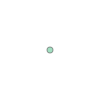

In [ ]:
from shapely.geometry import Point #biblioteca para sistemas de superficie

#teste com uma latitude e longitude da base de dados
latitude = -23.56
longitude = -46.59
Point(longitude, latitude)

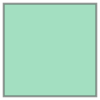

In [ ]:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd

In [ ]:
#quarta base de dados
setor_censo = gpd.read_file(
'/content/35SEE250GC_SIR.shp'
)
setor_censo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 68296 entries, 0 to 68295
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          68296 non-null  float64 
 1   CD_GEOCODI  68296 non-null  object  
 2   TIPO        68296 non-null  object  
 3   CD_GEOCODS  68296 non-null  object  
 4   NM_SUBDIST  0 non-null      object  
 5   CD_GEOCODD  68296 non-null  object  
 6   NM_DISTRIT  68296 non-null  object  
 7   CD_GEOCODM  68296 non-null  object  
 8   NM_MUNICIP  68296 non-null  object  
 9   NM_MICRO    68296 non-null  object  
 10  NM_MESO     68296 non-null  object  
 11  CD_GEOCODB  18797 non-null  object  
 12  NM_BAIRRO   18797 non-null  object  
 13  ID1         68296 non-null  int64   
 14  geometry    68296 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 7.8+ MB


In [ ]:
#Filtrando SP
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"]
setor_censo_sp.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 18953 entries, 42322 to 62384
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   ID          18953 non-null  float64 
 1   CD_GEOCODI  18953 non-null  object  
 2   TIPO        18953 non-null  object  
 3   CD_GEOCODS  18953 non-null  object  
 4   NM_SUBDIST  0 non-null      object  
 5   CD_GEOCODD  18953 non-null  object  
 6   NM_DISTRIT  18953 non-null  object  
 7   CD_GEOCODM  18953 non-null  object  
 8   NM_MUNICIP  18953 non-null  object  
 9   NM_MICRO    18953 non-null  object  
 10  NM_MESO     18953 non-null  object  
 11  CD_GEOCODB  0 non-null      object  
 12  NM_BAIRRO   0 non-null      object  
 13  ID1         18953 non-null  int64   
 14  geometry    18953 non-null  geometry
dtypes: float64(1), geometry(1), int64(1), object(12)
memory usage: 2.3+ MB


In [ ]:
dados_geo["Point"] = ""
for i in dados_geo.index:
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])

dados_geo['setor_censo'] = dados_geo["Point"].map(
    lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values
).str[0]
dados_geo.info()

<ipython-input-283-cfaac8501d69>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8520 entries, 0 to 89977
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rua            5639 non-null   object 
 1   Bairro         8512 non-null   object 
 2   Cidade         8520 non-null   object 
 3   Metragem       8520 non-null   int64  
 4   Quartos        8520 non-null   int64  
 5   Banheiros      8520 non-null   int64  
 6   Vagas          8520 non-null   int64  
 7   Valor          8520 non-null   object 
 8   Moeda          8520 non-null   object 
 9   Valor_anuncio  8520 non-null   float64
 10  Tipo_anuncio   0 non-null      object 
 11  Valor_m2       8520 non-null   float64
 12  Valor_mm       8520 non-null   float64
 13  apenas_rua     5639 non-null   object 
 14  rua            5639 non-null   object 
 15  cep            8520 non-null   float64
 16  latitude       8520 non-null   float64
 17  longitude      8520 non-null   float64
 18  Point  

In [ ]:
ibge_sp['Cod_setor'] = ibge_sp['Cod_setor'].astype(str)
dados_vendas_censo = pd.merge(left=dados_geo, right=ibge_sp, how="left", left_on="setor_censo", right_on="Cod_setor")

<Axes: xlabel='V005', ylabel='Valor_m2'>

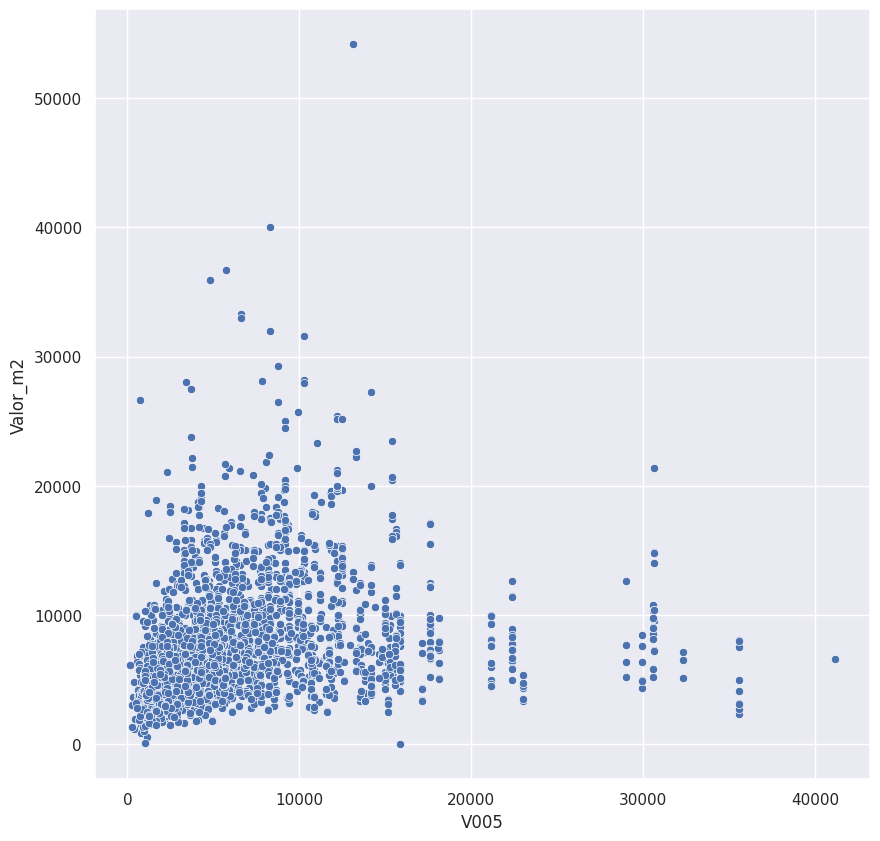

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="V005", y="Valor_m2")

In [ ]:
#Salvando a base de dados em um arquivo csv
dados_vendas_censo.to_csv('dados_vendas_censo.csv', index=False)